# Parameters

There are four options for parameters in `chromatic_fitting`: `Fixed`, `WavelikeFixed`, `Fitted`, and `WavelikeFitted`. `Fixed` is one fixed value for all wavelengths, `WavelikeFixed` are fixed values that are different between wavelengths. `Fitted` determines a prior distribution (e.g. `Uniform`, `Normal`, `TruncatedNormal`) that we will use to fit one value for the parameter across all wavelengths. Similarly, `WavelikeFitted` is a prior distribution that we will use to fit for a different value for every wavelength. 

In [ ]:
from chromatic_fitting import *
from pymc3 import Uniform, Normal
import pymc3 as pm
from pymc3 import sample_prior_predictive

### `Fixed`

A fixed value for all wavelengths.

In [ ]:
a = Fixed(3.0)
print(a)

When we call the `.get_prior()` function a `Fixed` parameter will just return its value:

In [ ]:
a.get_prior()

### `WavelikeFixed`

A fixed value for each wavelength:

In [ ]:
b = WavelikeFixed([1.0, 2.2, 3.6, 7.7])
print(b)

For the `WavelikeFixed` parameter we need to provide the wavelength index we want to the `.get_prior()` function

In [ ]:
b.get_prior(i=2)

### `Fitted`

The `Fitted` parameter is for fitting a prior distribution (`self.distribution`) with the given inputs (`self.inputs`) to give us one value for all wavelengths. We can use any distribution we like instead of Normal here, we just need to give it the correct inputs:

In [ ]:
c = Fitted(Normal, mu=1.0, sigma=0.1, name="c")
print(c)

Let's check we set up the distribution and inputs correctly:

In [ ]:
c.distribution, c.inputs

For the `Fitted` parameters we need to call the `.get_prior()` function inside of a PyMC3 model:

In [ ]:
with pm.Model() as mod:
    c.get_prior()

Now let's check the model (and see if our parameter has been set up in it!):

In [ ]:
mod

A final check we can do to understand this parameter is to sample from the prior we've given the model:

In [ ]:
with mod:
    # take 5000 samples from the prior distributions:
    sample = sample_prior_predictive(5000)

And if everything has worked then this should look like a Gaussian centred at 1 with ~sigma of 0.1!

In [ ]:
plt.hist(sample['c'], bins=20);

### `WavelikeFitted`

The `WavelikeFitted` parameter is fitting the prior distribution (`self.distribution`) with the given inputs (`self.inputs`) for each wavelength independantly.

In [ ]:
d = WavelikeFitted(Uniform, lower=1.0, upper=5.0, name="d")
print(d)

Let's check our distribution and input values:

In [ ]:
d.distribution, d.inputs

For `WavelikeFitted`, similarly to `Fitted` parameters, we also need to call the `.get_prior()` function inside a PyMC3 model, however, we need to tell the function which wavelength we want to fit:

In [ ]:
with pm.Model() as m:
    d.get_prior(i=2)
    d.get_prior(i=4)

Now if we look at the model we should see the parameters `d_w2` and `d_w4` because we've specified i=2 and i=4:

In [ ]:
m

In [ ]:
with m:
    sample = sample_prior_predictive(1000)

In [ ]:
plt.hist(sample['d_w4']);

Looks pretty uniform between 1-5!

Now if we look at the model we should see the parameters `d_w2` and `d_w4` because we've specified i=2 and i=4:

In [106]:
m

In [107]:
with m:
    sample = sample_prior_predictive(1000)

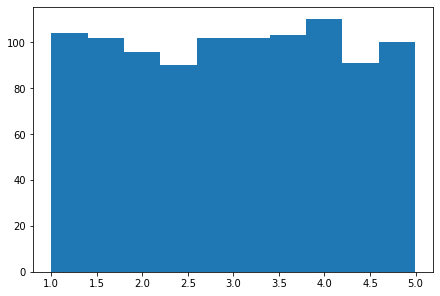

In [109]:
plt.hist(sample['d_w4']);

Looks pretty uniform between 1-5!